In [32]:
#importando bibliotecas
import pandas as pd
import numpy as np
import statistics as sts

In [49]:
#Importando dataframe
dataframe = pd.read_csv('caso_full.csv')

In [50]:
dataframe.head() #> Retorna as primeiras linhas de um DataFrame
#dataframe.info() #> Informações sobre o DataFrame
#dataframe.describe() #> Gera estatística descritiva para colunas numéricas

,city,city_ibge_code,date,epidemiological_week,estimated_population,estimated_population_2019,is_last,is_repeated,last_available_confirmed,last_available_confirmed_per_100k_inhabitants,last_available_date,last_available_death_rate,last_available_deaths,order_for_place,place_type,state,new_confirmed,new_deaths
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0


In [51]:
#Renomeando as colunas
dataframe.columns = ["Cidade", "Codigo IBGE Cidade", "Data", "Semana epidemiologica", "Populacao estimada", "Populacao estimada 2019", "Ultimo dado?", 
                    "Dado repetido?", "Casos confirmados", "Total casos confirmados por 100kHabitantes", "Data atualizada dados disponiveis",
                    "Taxa de letalidade", "Total mortes atualizada","Ordem de registros por posicao", "Tipo local registro", "Estado", "Novos casos confirmados",
                    "Novas mortes registradas"]

In [52]:
dataframe.head()

,Cidade,Codigo IBGE Cidade,Data,Semana epidemiologica,Populacao estimada,Populacao estimada 2019,Ultimo dado?,Dado repetido?,Casos confirmados,Total casos confirmados por 100kHabitantes,Data atualizada dados disponiveis,Taxa de letalidade,Total mortes atualizada,Ordem de registros por posicao,Tipo local registro,Estado,Novos casos confirmados,Novas mortes registradas
0,Rio Branco,1200401.0,2020-03-17,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-17,0.0,0,1,city,AC,3,0
1,NaN,12.0,2020-03-17,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-17,0.0,0,1,state,AC,3,0
2,Rio Branco,1200401.0,2020-03-18,202012,413418.0,407319.0,False,False,3,0.72566,2020-03-18,0.0,0,2,city,AC,0,0
3,NaN,12.0,2020-03-18,202012,894470.0,881935.0,False,False,3,0.33539,2020-03-18,0.0,0,2,state,AC,0,0
4,Rio Branco,1200401.0,2020-03-19,202012,413418.0,407319.0,False,False,4,0.96754,2020-03-19,0.0,0,3,city,AC,1,0


In [53]:
#Total de casos por ESTADO
total_mortes = dataframe.groupby(['Estado']).size()
total_mortes

Estado
AC     16150
AL     72120
AM     44620
AP     12061
BA    287758
CE    131734
DF      2234
ES     56954
GO    167029
MA    151588
MG    574802
MS     54377
MT     96994
PA    102768
PB    154071
PE    131561
PI    152463
PR    272487
RJ     67452
RN    116993
RO     37388
RR     12064
RS    335719
SC    204645
SE     52923
SP    448923
TO     95770
dtype: int64

In [60]:
#Selecionando os dados do DF
dataframe.loc[dataframe['Estado'] == 'DF']

,Cidade,Codigo IBGE Cidade,Data,Semana epidemiologica,Populacao estimada,Populacao estimada 2019,Ultimo dado?,Dado repetido?,Casos confirmados,Total casos confirmados por 100kHabitantes,Data atualizada dados disponiveis,Taxa de letalidade,Total mortes atualizada,Ordem de registros por posicao,Tipo local registro,Estado,Novos casos confirmados,Novas mortes registradas
564443,Brasília,5300108.0,2020-03-07,202010,3055149.0,3015268.0,False,False,1,0.03273,2020-03-07,0.0000,0,1,city,DF,1,0
564444,NaN,53.0,2020-03-07,202010,3055149.0,3015268.0,False,False,1,0.03273,2020-03-07,0.0000,0,1,state,DF,1,0
564445,Brasília,5300108.0,2020-03-08,202011,3055149.0,3015268.0,False,False,1,0.03273,2020-03-08,0.0000,0,2,city,DF,0,0
564446,NaN,53.0,2020-03-08,202011,3055149.0,3015268.0,False,False,1,0.03273,2020-03-08,0.0000,0,2,state,DF,0,0
564447,Brasília,5300108.0,2020-03-09,202011,3055149.0,3015268.0,False,False,1,0.03273,2020-03-09,0.0000,0,3,city,DF,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566672,Importados/Indefinidos,NaN,2022-03-26,202212,NaN,NaN,False,True,73534,NaN,2022-02-18,0.0133,980,731,city,DF,0,0
566673,NaN,53.0,2022-03-26,202212,3055149.0,3015268.0,False,True,691353,22629.10909,2022-03-25,0.0167,11573,750,state,DF,0,0
566674,Brasília,5300108.0,2022-03-27,202213,3055149.0,3015268.0,False,True,597871,19569.29106,2022-02-18,0.0173,10363,751,city,DF,0,0
566675,Importados/Indefinidos,NaN,2022-03-27,202213,NaN,NaN,False,True,73534,NaN,2022-02-18,0.0133,980,732,city,DF,0,0


In [58]:
#Selecionando as mortes em BRASÍLIA
dataframe.loc[dataframe['Cidade'] == 'Brasília', 'Total mortes atualizada']

564443        0
564445        0
564447        0
564449        0
564451        0
          ...  
566662    10363
566665    10363
566668    10363
566671    10363
566674    10363
Name: Total mortes atualizada, Length: 751, dtype: int64

<Axes: xlabel='Estado'>

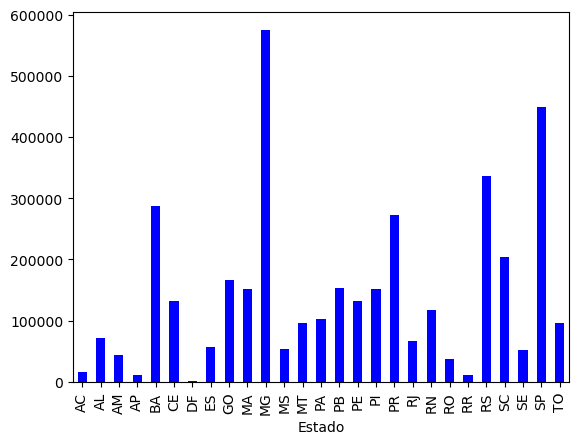

In [66]:
#Gráfico de barra para TOTAL MORTES ATUALIZADA por ESTADO
total_mortes.plot.bar(color = 'blue')

In [76]:
#Verificandp as cidades do dataframe
dataframe['Cidade'].unique()

array(['Rio Branco', nan, 'Acrelândia', ..., 'Talismã', 'Tupirama',
       'Tupiratins'], dtype=object)

In [84]:
#Filtrando a cidade de BRASILIA
dataframe_brasilia = dataframe[dataframe['Cidade'] == 'Brasília']
dataframe_brasilia

,Cidade,Codigo IBGE Cidade,Data,Semana epidemiologica,Populacao estimada,Populacao estimada 2019,Ultimo dado?,Dado repetido?,Casos confirmados,Total casos confirmados por 100kHabitantes,Data atualizada dados disponiveis,Taxa de letalidade,Total mortes atualizada,Ordem de registros por posicao,Tipo local registro,Estado,Novos casos confirmados,Novas mortes registradas
564443,Brasília,5300108.0,2020-03-07,202010,3055149.0,3015268.0,False,False,1,0.03273,2020-03-07,0.0000,0,1,city,DF,1,0
564445,Brasília,5300108.0,2020-03-08,202011,3055149.0,3015268.0,False,False,1,0.03273,2020-03-08,0.0000,0,2,city,DF,0,0
564447,Brasília,5300108.0,2020-03-09,202011,3055149.0,3015268.0,False,False,1,0.03273,2020-03-09,0.0000,0,3,city,DF,0,0
564449,Brasília,5300108.0,2020-03-10,202011,3055149.0,3015268.0,False,False,1,0.03273,2020-03-10,0.0000,0,4,city,DF,0,0
564451,Brasília,5300108.0,2020-03-11,202011,3055149.0,3015268.0,False,False,2,0.06546,2020-03-11,0.0000,0,5,city,DF,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566662,Brasília,5300108.0,2022-03-23,202212,3055149.0,3015268.0,False,True,597871,19569.29106,2022-02-18,0.0173,10363,747,city,DF,0,0
566665,Brasília,5300108.0,2022-03-24,202212,3055149.0,3015268.0,False,True,597871,19569.29106,2022-02-18,0.0173,10363,748,city,DF,0,0
566668,Brasília,5300108.0,2022-03-25,202212,3055149.0,3015268.0,False,True,597871,19569.29106,2022-02-18,0.0173,10363,749,city,DF,0,0
566671,Brasília,5300108.0,2022-03-26,202212,3055149.0,3015268.0,False,True,597871,19569.29106,2022-02-18,0.0173,10363,750,city,DF,0,0


In [86]:
#Verificando a população estimada de Brasilia
populacao_brasilia = dataframe_brasilia['Populacao estimada'].iloc[0]
populacao_brasilia

3055149.0